# Cas pratique: application du modèle de Bradley-Terry dans un contexte aléatoire

Notre objectif est d'appliquer les résultats d'un papier de recherche afin de modéliser et prédire les chances de victoires de différents joueurs d'un tournoi ou chacun ne se rencontre qu'une seule fois.

Nous utiliserons en premier lieu des données fictives afin d'illustrer le principe de ce type de modélisation ainsi que les théorèmes associés. Nous passerons ensuite à une application réelle sur des données de la Ligue 1 afin de tester l'efficacité de de type de modèle et des résultats obtenus.

#### I. Initialisation

Installation des packages utiles.

In [80]:
from estimate_V import *
from Bradley_Terry import *
from ligue1_tools import *
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### II. Simulation de données fictives.

Nous commencons par créer un jeu de données avec une matrice de victoire factice dans un tournoi entre 20 joueurs, dans laquelle on a une distribution uniforme des victoires parmi tous les joueurs.

<AxesSubplot: >

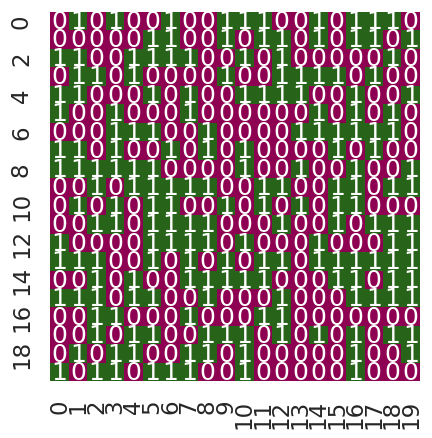

In [81]:
np.random.seed(56)
victory_matrix_array = generate_tournament_matrix(20)

sns.heatmap(victory_matrix_array, cbar=False, annot=True, square= True, cmap='PiYG')

On remarque alors que certains joueurs accummulent naturellement plus de victoires. A partir de cette information, il nous est possible d'estimer la "force" de chaque joueur grâce à un simple calcul de maximum de vraisemblance. (Se référer au mémoire pour plus d'informations ?)

<AxesSubplot: >

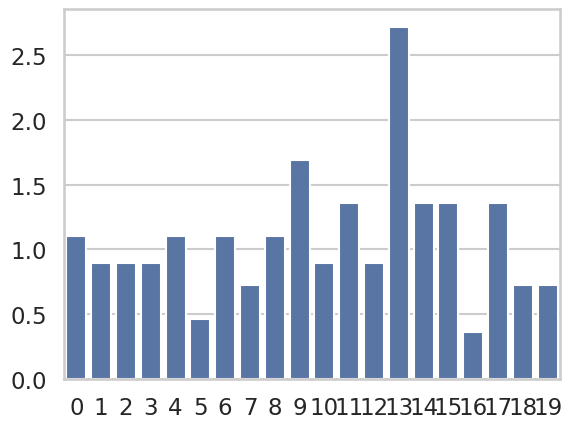

In [82]:
V_hat = compute_V(victory_matrix_array)

sns.barplot(V_hat)

Une fois les forces de chaque joueur estimées en fonction des résultats passés, il nous est alors possible de prédire à partir du modèle de Bradley-Terry le joueur qui aura le plus de chance de gagner un prochain tournoi. 

Ici on remarque bien que le joueur 13 a une force plus elevée que tous les autres. Notre modèle lui donnera donc la probabilité de victoire la plus élevée. En pratique ce ne sera pas toujours lui le vainqueur puisque le résultat dépend de la réalisation d'une variable aléatoire de Bernoulli en fonction des probabilités données.

En fonction de la distribution de nos forces, on peut en revanche donner plusieurs propriétés, et notamment trouver un seuil à partir duquel on est sûr qu'au moins un des joueurs du top X sera le vainqueur.
(comment illustrer tout ça ? la question se pose...)

On calcule ici par exemple la probabilité de victoire du joueur 13 contre tous les autres joueurs:

(0.0, 1.0)

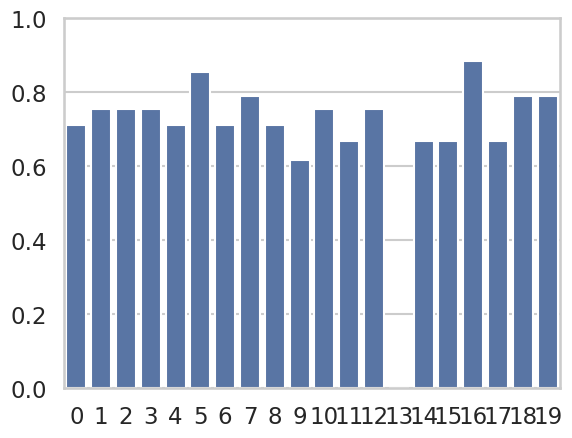

In [83]:
Tournoi = BT_Tournament(V_hat)

force_13 = []

for j in range(len(V_hat)):
    if 13 != j:
        force_13.append(Tournoi.compute_probs(13,j))
    else:
        force_13.append(0)


sns.barplot(force_13)
plt.ylim(0,1)

On remarque donc que le joueur 13 a une probabilité de victoire très élevée contre chaque autre joueur. Au contraire, si on regarde celle du joueur 16, ses probabilités de victoire ne dépassent pas 0.5

(0.0, 1.0)

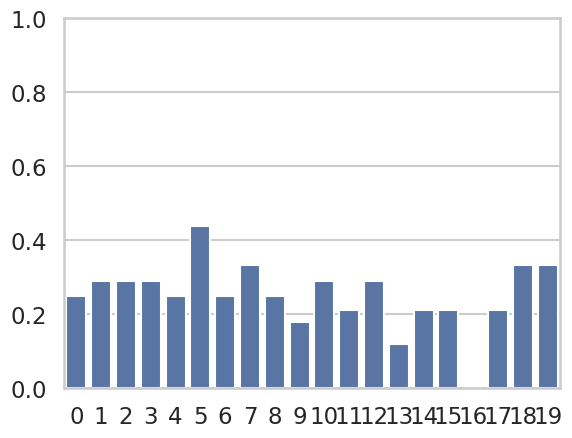

In [84]:
force_16 = []

for j in range(len(V_hat)):
    if 16 != j:
        force_16.append(Tournoi.compute_probs(16,j))
    else:
        force_16.append(0)

sns.barplot(force_16)
plt.ylim(0,1)


On essaie enfin de simuler un prochain tournoi avec les forces calculées en jeu.

In [85]:
print(Tournoi.winner())

15


Comme prévu, puisque le résultats dépend des probabilités ainsi calculées, on obtient pas forcément le même résultat à chaque fois. On décide alors de simuler 100 tournois avec ces forces là pour déterminer la fréquence de chaque vainqeur prédit

In [86]:
wins = []

for i in range(0,100):
    wins.append(Tournoi.winner())

print(wins)

[11, 13, 13, 2, 13, 8, 13, 19, 13, 13, 13, 13, 13, 9, 13, 11, 13, 13, 13, 13, 13, 9, 17, 14, 17, 13, 9, 1, 17, 11, 13, 9, 9, 13, 12, 9, 13, 13, 13, 14, 6, 9, 13, 9, 15, 0, 9, 13, 9, 8, 10, 13, 13, 13, 13, 0, 14, 13, 13, 13, 13, 14, 9, 9, 13, 15, 4, 0, 13, 13, 13, 8, 13, 11, 15, 13, 13, 13, 13, 9, 13, 19, 15, 9, 13, 13, 13, 10, 13, 13, 13, 13, 13, 9, 13, 15, 3, 9, 14, 13]


On remarque alors que le joueur n°13 revient le plus souvent, ce qui est cohérent. On a aussi une liste limitée de joueurs: 13, 11, 9, 8, 14 et 17.

## Application à des données de la ligue 1

On prédit le vainqueur de la ligue à partir les matchs aller

In [87]:
results = get_ligue_results('2122')
aller,retour = split_season(results)

wins_dataset = total_wins(results)
print(type(victory_matrix))
v_matrix = victory_matrix(aller)

strenght = compute_V(v_matrix)
print(results)

<class 'function'>
         Date   HomeTeam    AwayTeam  FTHG  FTAG FTR  HTHG  HTAG HTR  Referee  \
0    06/08/21     Monaco      Nantes     1     1   D     1     1   D      NaN   
1    07/08/21       Lyon       Brest     1     1   D     0     1   A      NaN   
2    07/08/21     Troyes    Paris SG     1     2   A     1     2   A      NaN   
3    08/08/21     Rennes        Lens     1     1   D     1     1   D      NaN   
4    08/08/21   Bordeaux    Clermont     0     2   A     0     0   D      NaN   
..        ...        ...         ...   ...   ...  ..   ...   ...  ..      ...   
375  21/05/22    Lorient      Troyes     1     1   D     0     1   A      NaN   
376  21/05/22  Marseille  Strasbourg     4     0   H     1     0   H      NaN   
377  21/05/22     Nantes  St Etienne     1     1   D     1     0   H      NaN   
378  21/05/22   Paris SG        Metz     5     0   H     3     0   H      NaN   
379  21/05/22      Reims        Nice     2     3   A     2     0   H      NaN   

     ...

In [88]:
teams = sorted(set(results['HomeTeam']).union(set(results['AwayTeam'])))
strenght_df = pd.DataFrame()
strenght_df['Team'] = teams
strenght_df['strenght'] = strenght

strenght_df

,Team,strenght
0,Angers,1.236844
1,Bordeaux,0.398657
2,Brest,0.784005
3,Clermont,0.312941
4,Lens,0.627889
5,Lille,0.784005
6,Lorient,0.398657
7,Lyon,0.784005
8,Marseille,0.981299
9,Metz,0.312944


/tmp/ipykernel_141027/4288265914.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sorted_strength, y='Team', x='strenght', palette=palette)


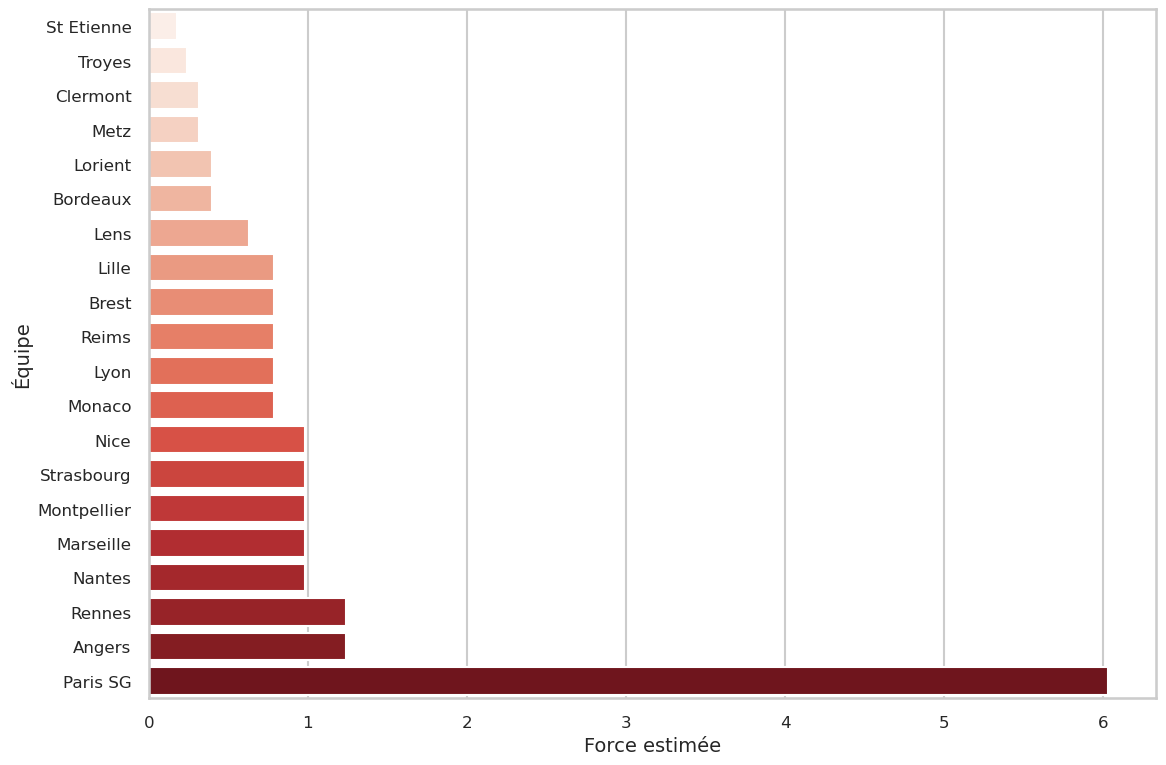

In [104]:
sorted_strength = strenght_df.sort_values(by='strenght')

# Style et palette
sns.set_style('whitegrid')
palette = sns.color_palette("Reds", len(sorted_strength))

# Création de la figure
plt.figure(figsize=(12, 8))
sns.barplot(data=sorted_strength, y='Team', x='strenght', palette=palette)

# Titre et axes
plt.xlabel("Force estimée", fontsize=14)
plt.ylabel("Équipe", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

In [90]:
ligue = BT_Tournament(strenght)

print(strenght_df.iloc[ligue.winner()])

Team        Paris SG
strenght    6.029083
Name: 14, dtype: object


In [91]:
score_list = []
for i in range(len(strenght)):
    score_list.append(ligue.score(i))

strenght_df['Score'] = score_list

strenght_df

,Team,strenght,Score
0,Angers,1.236844,7
1,Bordeaux,0.398657,7
2,Brest,0.784005,10
3,Clermont,0.312941,7
4,Lens,0.627889,10
5,Lille,0.784005,9
6,Lorient,0.398657,4
7,Lyon,0.784005,12
8,Marseille,0.981299,6
9,Metz,0.312944,6


On compare ça avec les victoires réelles de chaque équipes sur les matchs retours

In [92]:
wins_retour = total_wins(retour)

wins_retour

,Team,HomeWins,AwayWins,TotalWins
0,Bordeaux,2,1,3
1,Brest,4,3,7
2,Clermont,2,3,5
3,Lens,5,5,10
4,Lille,3,4,7
5,Lorient,3,2,5
6,Lyon,6,4,10
7,Marseille,5,7,12
8,Metz,2,1,3
9,Monaco,7,5,12


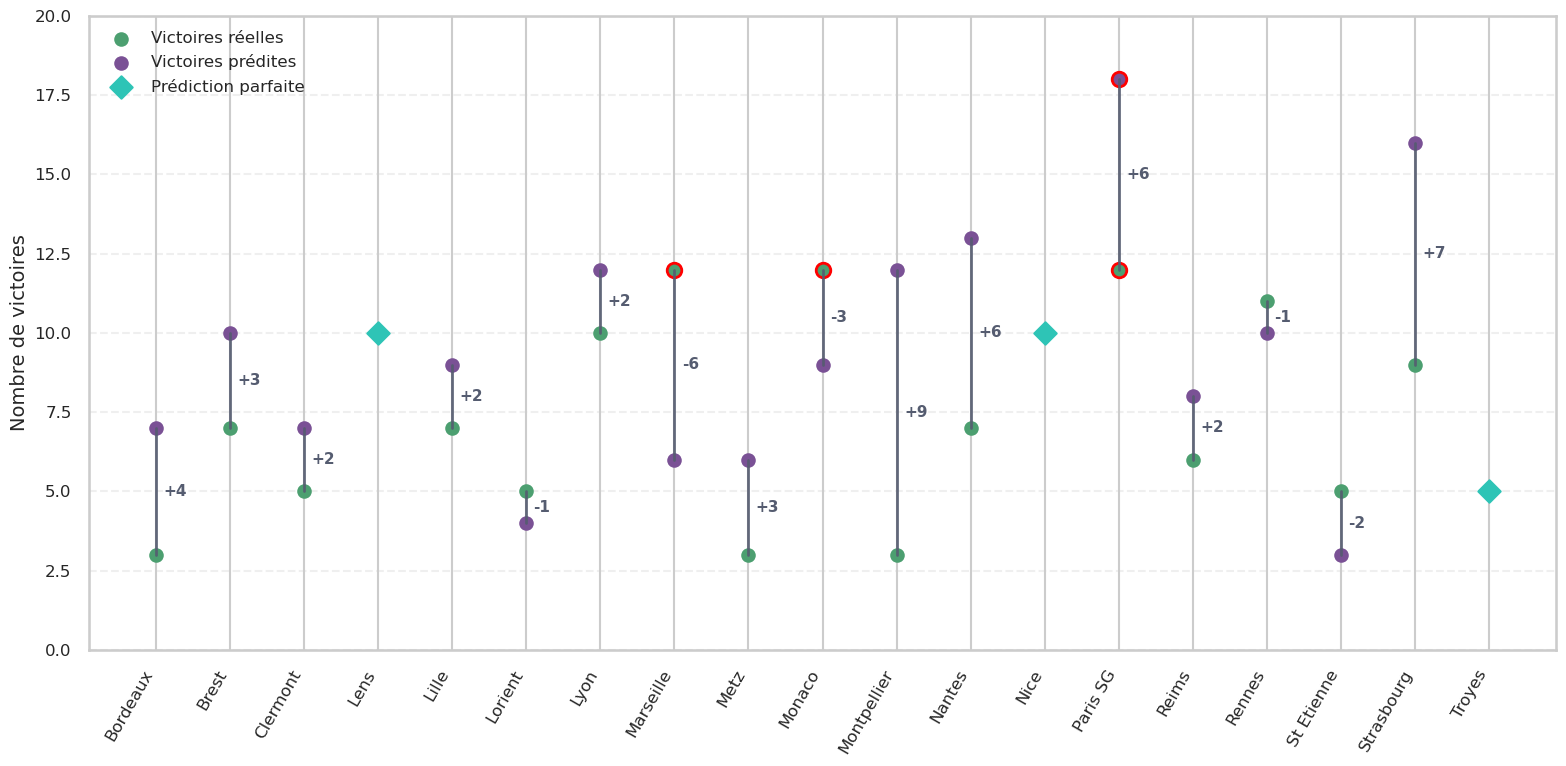

In [105]:
plot_df = pd.merge(wins_retour,strenght_df,on='Team')
plot_df


def compare_plot(plot_df):
    # Couleurs modernisées
    color_real = "#4C9F70"       # Vert foncé doux
    color_pred = "#7A5195"       # Violet profond
    color_equal = "#2EC4B6"      # Turquoise vif
    line_color = "#555C70"       # Gris-bleu foncé

    # Masques pour égalité et max
    plot_df['Equal'] = plot_df['TotalWins'] == plot_df['Score']
    max_real_indices = plot_df[plot_df['TotalWins'] == plot_df['TotalWins'].max()].index
    max_pred_indices = plot_df[plot_df['Score'] == plot_df['Score'].max()].index

    # Initialisation du style
    plt.figure(figsize=(16, 8))
    sns.set_theme(style="whitegrid", context="talk")

    # Drapeau pour afficher une seule fois le label "Prédiction parfaite"
    plotted_equal_label = False

    # Tracé
    for i, row in plot_df.iterrows():
        team = row['Team']
        real = row['TotalWins']
        pred = row['Score']
        is_max_real = i in max_real_indices
        is_max_pred = i in max_pred_indices

        if row['Equal']:
            plt.scatter(team, real, color=color_equal, marker='D', s=130,
                        label='Prédiction parfaite' if not plotted_equal_label else "")
            plotted_equal_label = True
        else:
            plt.scatter(team, real, color=color_real, s=110,
                        edgecolor='red' if is_max_real else 'black',
                        linewidth=2 if is_max_real else 0,
                        label='Victoires réelles' if i == 0 else "")
            plt.scatter(team, pred, color=color_pred, s=110,
                        edgecolor='red' if is_max_pred else 'black',
                        linewidth=2 if is_max_pred else 0,
                        label='Victoires prédites' if i == 0 else "")
            plt.plot([team, team], [real, pred], color=line_color, alpha=0.9, linewidth=2)

            # Annotation
            mid_y = (real + pred) / 2
            diff = pred - real
            label = f"{'+' if diff > 0 else ''}{diff}"
            plt.text(i + 0.1, mid_y, label, ha='left', va='center',
                     fontsize=11, weight='bold', color=line_color)

    # Affichage final
    plt.xticks(range(len(plot_df)), plot_df['Team'], rotation=60, ha='right', fontsize=12)
    plt.yticks(fontsize=12)
    plt.ylabel('Nombre de victoires', fontsize=14)
    plt.grid(axis='y', linestyle='--', alpha=0.3)
    plt.ylim(0, max(plot_df[['TotalWins', 'Score']].max()) + 2)
    plt.legend(loc='upper left', frameon=False, fontsize=12)
    plt.tight_layout()
    plt.show()




compare_plot(plot_df)

In [107]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

team_features = ['HST','HC','HY','HR']  # shots on target, fouls, corners, yellow cards

log_df = pd.DataFrame()
log_df['HomeTeam'] = aller['HomeTeam']
log_df['AwayTeam'] = aller['AwayTeam']

# Variable cible : 1 si l'équipe à domicile gagne, 0 sinon
log_df['HomeWin'] = (aller['FTHG'] > aller['FTAG']).astype(int)

# Création des différences de features (home - away)
for feat in team_features:
    away_feat = 'A' + feat[1:]
    log_df[f'diff_{feat}'] = aller[feat] - aller[away_feat]

# Sélection des features finales
feature_cols = [f'diff_{feat}' for feat in team_features]
X = log_df[feature_cols]
y = log_df['HomeWin']

# Pipeline standardisation + régression logistique avec régularisation L2
pipeline = make_pipeline(
    StandardScaler(),
    LogisticRegression(penalty='l2', solver='liblinear')
)

# Entraînement du modèle
pipeline.fit(X, y)

# Affichage des coefficients
coefs = pipeline.named_steps['logisticregression'].coef_[0]
for name, coef in zip(feature_cols, coefs):
    print(f"{name}: {coef:.4f}")

# Exemple de prédiction
y_proba = pipeline.predict_proba(X)[:, 1]  # proba que HomeTeam gagne
log_df['HomeWinprob'] = y_proba

print(log_df)

diff_HST: 1.0013
diff_HC: -0.3607
diff_HY: 0.0171
diff_HR: -0.4910
       HomeTeam    AwayTeam  HomeWin diff_HST diff_HC diff_HY diff_HR  \
0        Monaco      Nantes        0        2       3       0       0   
1          Lyon       Brest        0       -4       5       0       0   
2        Troyes    Paris SG        0        4       8      -3       0   
3        Rennes        Lens        0       -4      -6      -2       0   
4      Bordeaux    Clermont        0       -4      -5       1       0   
..          ...         ...      ...      ...     ...     ...     ...   
185        Nice        Lens        1       -1       1      -2       0   
186  St Etienne      Nantes        0        3       1       0       0   
187      Troyes       Brest        0        2       9       3       1   
188    Clermont  Strasbourg        0       -4       2       2       0   
189        Lyon   Marseille        1        3      -2       0       0   

     HomeWinprob  
0       0.439987  
1       0.083089  

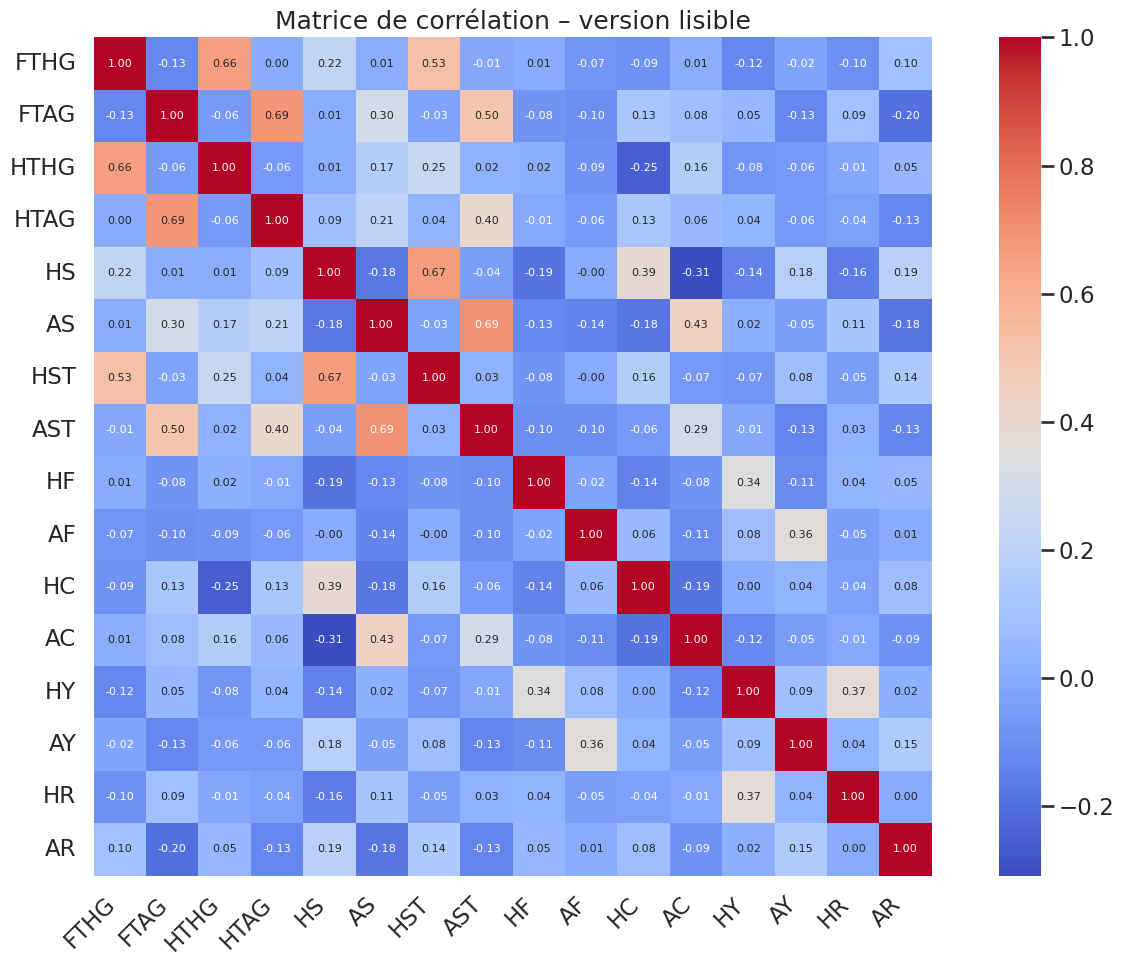

In [106]:
# Liste des variables numériques
variables = [
    'FTHG', 'FTAG', 'HTHG', 'HTAG', 'HS', 'AS', 'HST', 'AST',
    'HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR'
]

# Filtrage des colonnes disponibles
df_selected = aller[variables]

# Matrice de corrélation
corr_matrix = df_selected.corr()

# Affichage heatmap lisible
plt.figure(figsize=(14, 10))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    square=True,
    annot_kws={'size': 8}
)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.title("Matrice de corrélation – version lisible")
plt.tight_layout()
plt.show()

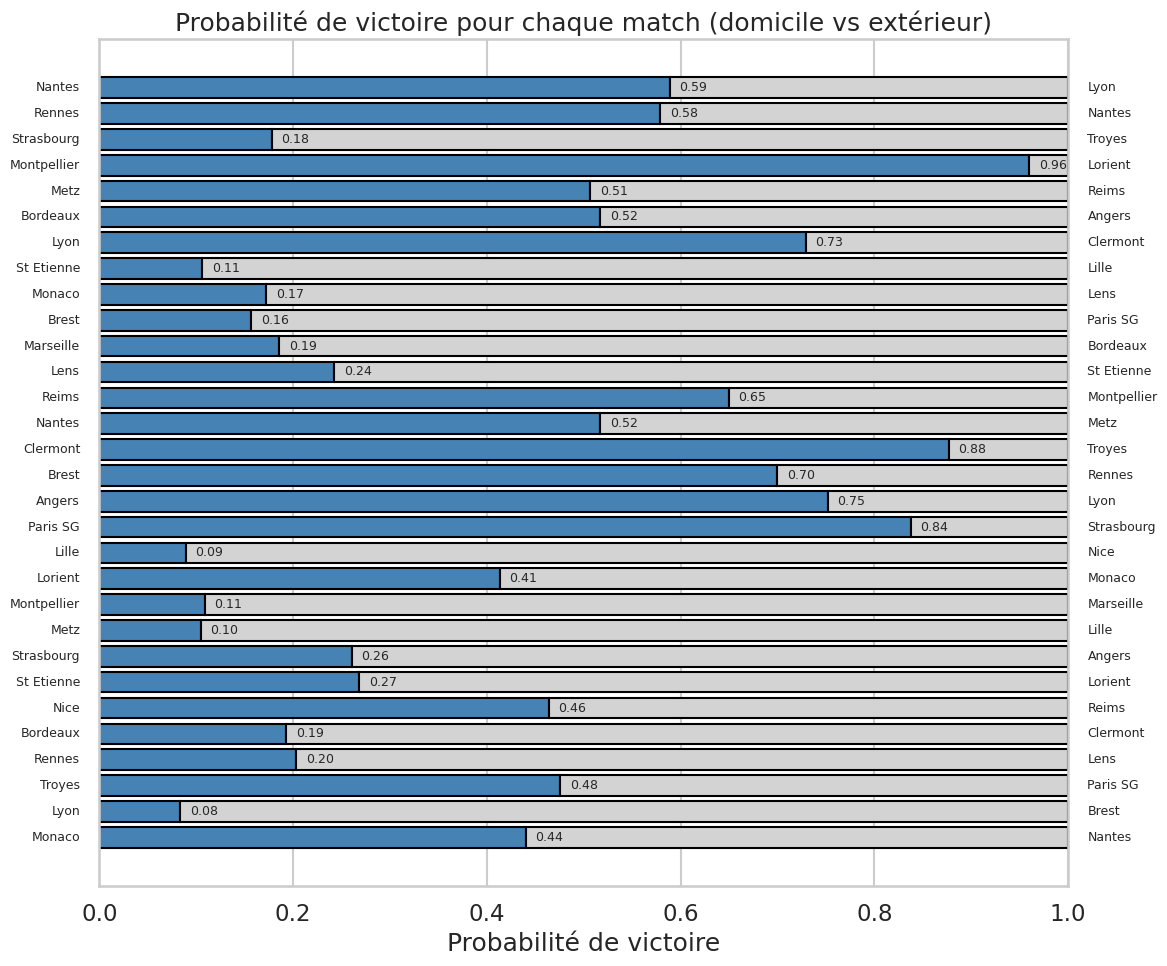

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Nombre de matchs à afficher
N = 30
subset = log_df.iloc[:N]

# Données
home_probs = subset['HomeWinprob'].values
away_probs = 1 - home_probs
home_teams = subset['HomeTeam'].values
away_teams = subset['AwayTeam'].values
y_pos = np.arange(N)

# Taille de la figure
plt.figure(figsize=(12, 10))

# Barre gauche (home)
plt.barh(y_pos, home_probs, color='steelblue', edgecolor='black', label='Home Win Prob')

# Barre droite (away), en partant de la droite (1 - away_proba)
plt.barh(y_pos, away_probs, left=1 - away_probs, color='lightgray', edgecolor='black', label='Away Win Prob')

# Texte de la proba à domicile (sur la barre bleue)
for i, p in enumerate(home_probs):
    plt.text(p + 0.01, y_pos[i], f"{p:.2f}", va='center', ha='left', fontsize=9)

# Ajout des noms d'équipes
for i in range(N):
    plt.text(-0.02, y_pos[i], home_teams[i], va='center', ha='right', fontsize=9)
    plt.text(1.02, y_pos[i], away_teams[i], va='center', ha='left', fontsize=9)

# Mise en forme
plt.xlim(0, 1)
plt.yticks([])
plt.xlabel("Probabilité de victoire")
plt.tight_layout()
plt.show()




In [99]:
# S'assurer que les noms d’équipes sont complets
teams = pd.concat([log_df['HomeTeam'], log_df['AwayTeam']]).unique()
scores = {team: 0 for team in teams}

# Simulation aléatoire de chaque match
np.random.seed(34)  # pour reproductibilité

for _, row in log_df.iterrows():
    home = row['HomeTeam']
    away = row['AwayTeam']
    p_home_win = row['HomeWinprob']

    home_wins = np.random.rand() < p_home_win

    if home_wins:
        scores[home] += 1
    else:
        scores[away] += 1

# Convertir en DataFrame de classement
score_df = pd.DataFrame.from_dict(scores, orient='index', columns=['Score'])
score_df = score_df.reset_index().rename(columns={'index': 'Team'})
score_df = score_df.sort_values('Score', ascending=False)

score_df

,Team,Score
1,Lyon,13
3,Rennes,13
18,Lens,12
12,Paris SG,12
17,Reims,11
0,Monaco,10
14,Brest,10
10,Lorient,10
7,Strasbourg,10
6,St Etienne,10


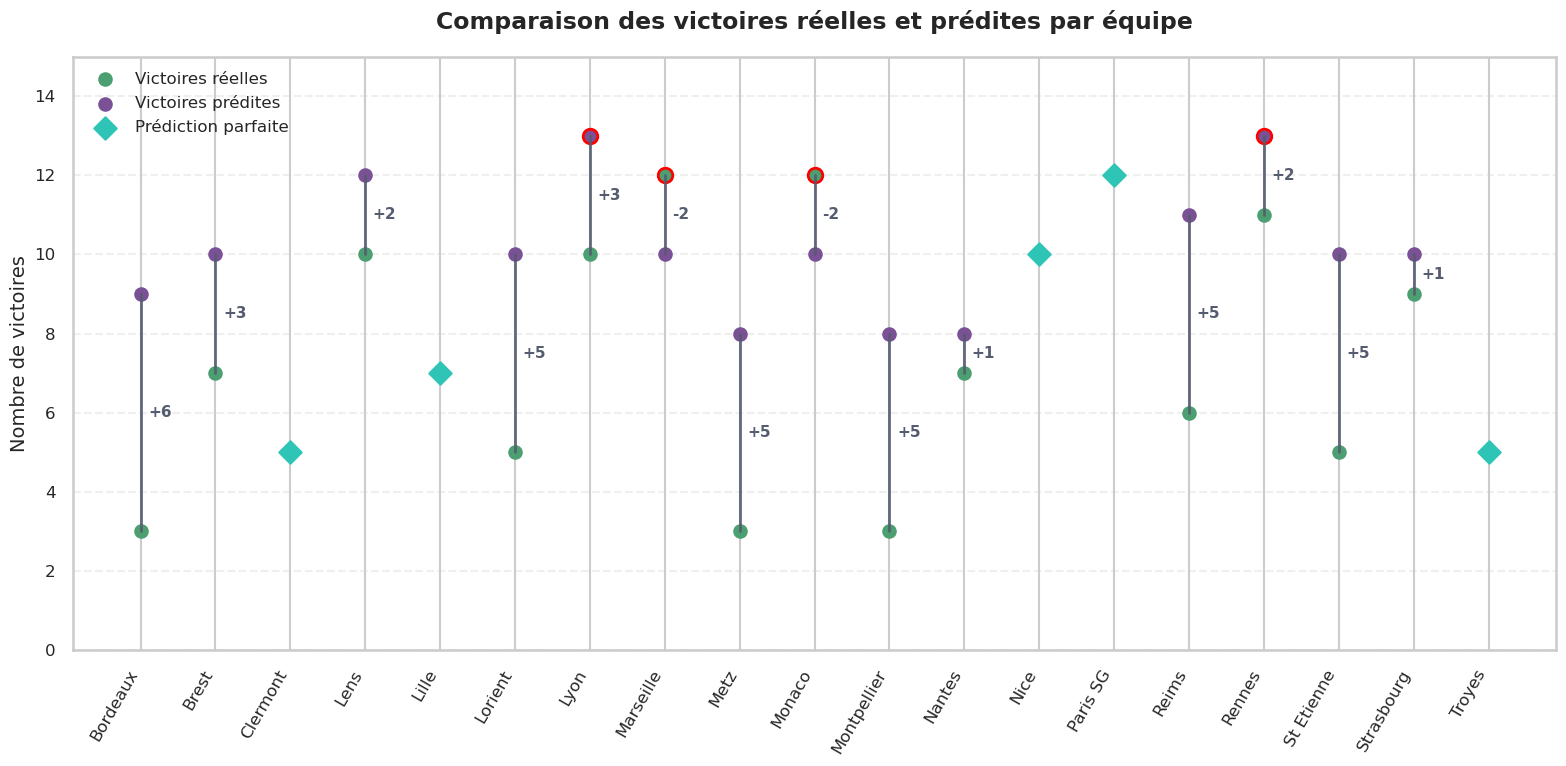

In [100]:
plot_df = pd.merge(wins_retour,score_df,on='Team')

compare_plot(plot_df)